In [11]:
import pandas as pd 
import numpy as np 
import os
import cv2
import tensorflow as tf
import datetime
import re
import matplotlib.pyplot as plt


In [12]:
print(tf.__version__)

2.2.0


#### Importing the training Images

In [6]:

path='/home/dai/Documents/Data Science Certificate/Course 4/Group Assignment/chest_xray/train/PNEUMONIA'

pneunmonia_imgs=os.listdir(path)
i=0
print(i)
print(pneunmonia_imgs[i])
imgs=cv2.imread(path + '/' +pneunmonia_imgs[i])

path_normal='/home/dai/Documents/Data Science Certificate/Course 4/Group Assignment/chest_xray/train/NORMAL'

normal_imgs=os.listdir(path_normal)

imgs_normal=cv2.imread(path_normal + '/' +normal_imgs[i])

print(i)
print(normal_imgs[i])


0
person383_bacteria_1747.jpeg
0
NORMAL2-IM-0950-0001.jpeg


#### Importing the val Images

In [9]:

path_val='/home/dai/Documents/Data Science Certificate/Course 4/Group Assignment/chest_xray/val/PNEUMONIA'

pneunmonia_imgs_val=os.listdir(path_val)
i=0
print(i)
print(pneunmonia_imgs_val[i])
imgs_val=cv2.imread(path_val + '/' +pneunmonia_imgs_val[i])

path_normal_val='/home/dai/Documents/Data Science Certificate/Course 4/Group Assignment/chest_xray/val/NORMAL'

normal_imgs_val=os.listdir(path_normal_val)

imgs_normal_val=cv2.imread(path_normal_val + '/' +normal_imgs_val[i])

print(i)
print(normal_imgs_val[i])


0
person1946_bacteria_4874.jpeg
0
NORMAL2-IM-1427-0001.jpeg


#### Importing the test Images

In [10]:

path_test='/home/dai/Documents/Data Science Certificate/Course 4/Group Assignment/chest_xray/test/PNEUMONIA'

pneunmonia_imgs_test=os.listdir(path_test)
i=0
print(i)
print(pneunmonia_imgs_test[i])
imgs_test=cv2.imread(path_test + '/' +pneunmonia_imgs_test[i])

path_normal_test='/home/dai/Documents/Data Science Certificate/Course 4/Group Assignment/chest_xray/test/NORMAL'

normal_imgs_test=os.listdir(path_normal_test)

imgs_normal_test=cv2.imread(path_normal_test + '/' +normal_imgs_test[i])

print(i)
print(normal_imgs_test[i])

0
person157_bacteria_739.jpeg
0
NORMAL2-IM-0357-0001.jpeg


#### PNEUMONIA

In [10]:
cv2.namedWindow('inputs', cv2.WINDOW_AUTOSIZE)
cv2.imshow('inputs',imgs)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [17]:
imgs2=cv2.resize(imgs,(256,256))
cv2.namedWindow('inputs2', cv2.WINDOW_AUTOSIZE)
cv2.imshow('inputs2',imgs2)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### NORMAL

In [11]:
cv2.namedWindow('normal', cv2.WINDOW_AUTOSIZE)
cv2.imshow('normal',imgs_normal)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
imgs2

array([[[41, 41, 41],
        [37, 37, 37],
        [43, 43, 43],
        ...,
        [45, 45, 45],
        [70, 70, 70],
        [79, 79, 79]],

       [[44, 44, 44],
        [45, 45, 45],
        [47, 47, 47],
        ...,
        [30, 30, 30],
        [42, 42, 42],
        [76, 76, 76]],

       [[47, 47, 47],
        [47, 47, 47],
        [56, 56, 56],
        ...,
        [33, 33, 33],
        [33, 33, 33],
        [61, 61, 61]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

In [19]:
imgs2[0]

array([[ 41,  41,  41],
       [ 37,  37,  37],
       [ 43,  43,  43],
       [ 51,  51,  51],
       [ 62,  62,  62],
       [ 72,  72,  72],
       [ 83,  83,  83],
       [ 90,  90,  90],
       [ 95,  95,  95],
       [ 96,  96,  96],
       [101, 101, 101],
       [103, 103, 103],
       [105, 105, 105],
       [100, 100, 100],
       [103, 103, 103],
       [125, 125, 125],
       [114, 114, 114],
       [107, 107, 107],
       [112, 112, 112],
       [105, 105, 105],
       [109, 109, 109],
       [110, 110, 110],
       [111, 111, 111],
       [108, 108, 108],
       [108, 108, 108],
       [ 88,  88,  88],
       [ 85,  85,  85],
       [ 85,  85,  85],
       [ 81,  81,  81],
       [ 78,  78,  78],
       [ 81,  81,  81],
       [ 62,  62,  62],
       [ 59,  59,  59],
       [ 52,  52,  52],
       [ 59,  59,  59],
       [ 62,  62,  62],
       [ 66,  66,  66],
       [ 72,  72,  72],
       [ 76,  76,  76],
       [ 76,  76,  76],
       [ 75,  75,  75],
       [ 86,  86

In [23]:
imgs2[0].shape

(256, 3)

In [27]:
imgs2[1][:256][2][1]

47

#### Reading the PNEUMONIA TRAIN IMAGES

In [14]:
def converting_imgstodf(normal_imgs,path_normal,dimension):  

    pos=[i for i in np.arange(0,dimension,3)]
    start=datetime.datetime.now()



    normaldf=pd.DataFrame()

    for i in range(0,len(normal_imgs)):
        print(i)
        print(normal_imgs[i])
        if len(re.findall("jpeg",normal_imgs[i]))>0:
            imgs_normal=cv2.imread(path_normal + '/' +normal_imgs[i])
            imgs_normal2=cv2.resize(imgs_normal,(256,256))
            normal_dataframe=pd.DataFrame(np.ravel(imgs_normal2)[pos]).transpose()
            normaldf=pd.concat([normaldf,normal_dataframe],axis=0)

    print("time elapsed", (datetime.datetime.now()-start) )
    return(normaldf)


In [15]:
dimension1=256*256*3
print(dimension1)
normaldf=converting_imgstodf(normal_imgs,path_normal,dimension1)
pneumoniadf=converting_imgstodf(pneunmonia_imgs,path,dimension1)


196608
0
NORMAL2-IM-0950-0001.jpeg
1
IM-0621-0001.jpeg
2
IM-0330-0001.jpeg
3
IM-0410-0001.jpeg
4
IM-0636-0001.jpeg
5
IM-0628-0001.jpeg
6
NORMAL2-IM-0757-0001.jpeg
7
NORMAL2-IM-0894-0001.jpeg
8
NORMAL2-IM-0847-0001.jpeg
9
IM-0553-0001-0001.jpeg
10
NORMAL2-IM-1271-0001.jpeg
11
IM-0667-0001.jpeg
12
IM-0237-0001.jpeg
13
IM-0622-0001.jpeg
14
NORMAL2-IM-0989-0001.jpeg
15
NORMAL2-IM-0966-0001.jpeg
16
IM-0549-0001-0001.jpeg
17
IM-0629-0001-0001.jpeg
18
NORMAL2-IM-0629-0001.jpeg
19
NORMAL2-IM-0857-0001.jpeg
20
NORMAL2-IM-0810-0001.jpeg
21
NORMAL2-IM-0885-0001.jpeg
22
IM-0523-0001-0003.jpeg
23
NORMAL2-IM-1019-0001.jpeg
24
IM-0478-0001.jpeg
25
NORMAL2-IM-1350-0001.jpeg
26
NORMAL2-IM-1302-0001.jpeg
27
IM-0372-0001.jpeg
28
NORMAL2-IM-1125-0001.jpeg
29
NORMAL2-IM-1005-0001.jpeg
30
NORMAL2-IM-0994-0001.jpeg
31
NORMAL2-IM-0831-0001.jpeg
32
NORMAL2-IM-1285-0001.jpeg
33
NORMAL2-IM-1308-0001.jpeg
34
NORMAL2-IM-0458-0001.jpeg
35
NORMAL2-IM-1219-0001.jpeg
36
NORMAL2-IM-1106-0001.jpeg
37
NORMAL2-IM-1015-000

312
IM-0377-0001.jpeg
313
IM-0408-0001.jpeg
314
IM-0678-0001.jpeg
315
IM-0496-0001.jpeg
316
IM-0618-0001-0002.jpeg
317
NORMAL2-IM-0525-0001.jpeg
318
NORMAL2-IM-0832-0001-0002.jpeg
319
IM-0471-0001.jpeg
320
NORMAL2-IM-0474-0001.jpeg
321
IM-0452-0001.jpeg
322
NORMAL2-IM-0843-0001.jpeg
323
IM-0533-0001.jpeg
324
NORMAL2-IM-0533-0001.jpeg
325
NORMAL2-IM-0753-0001.jpeg
326
IM-0479-0001.jpeg
327
NORMAL2-IM-0840-0001.jpeg
328
IM-0154-0001.jpeg
329
IM-0480-0001.jpeg
330
NORMAL2-IM-0723-0001.jpeg
331
IM-0147-0001.jpeg
332
NORMAL2-IM-0417-0001.jpeg
333
NORMAL2-IM-0496-0001.jpeg
334
NORMAL2-IM-0618-0001.jpeg
335
NORMAL2-IM-0905-0001.jpeg
336
IM-0145-0001.jpeg
337
IM-0442-0001.jpeg
338
IM-0438-0001.jpeg
339
NORMAL2-IM-1037-0001.jpeg
340
NORMAL2-IM-0635-0001.jpeg
341
IM-0545-0001-0001.jpeg
342
IM-0544-0001.jpeg
343
NORMAL2-IM-0622-0001.jpeg
344
IM-0494-0001.jpeg
345
NORMAL2-IM-1026-0001.jpeg
346
NORMAL2-IM-0689-0001.jpeg
347
IM-0666-0001.jpeg
348
NORMAL2-IM-0875-0001.jpeg
349
NORMAL2-IM-1335-0001.jp

620
IM-0424-0001.jpeg
621
NORMAL2-IM-0874-0001.jpeg
622
NORMAL2-IM-0727-0001.jpeg
623
NORMAL2-IM-0671-0001.jpeg
624
NORMAL2-IM-0475-0001.jpeg
625
IM-0539-0001.jpeg
626
IM-0217-0001.jpeg
627
IM-0650-0001-0001.jpeg
628
NORMAL2-IM-1333-0001.jpeg
629
NORMAL2-IM-1316-0001.jpeg
630
NORMAL2-IM-0660-0001.jpeg
631
IM-0687-0001.jpeg
632
IM-0650-0001-0002.jpeg
633
IM-0534-0001.jpeg
634
NORMAL2-IM-0772-0001.jpeg
635
NORMAL2-IM-1214-0001.jpeg
636
NORMAL2-IM-0520-0001.jpeg
637
NORMAL2-IM-0416-0001-0002.jpeg
638
NORMAL2-IM-0957-0001.jpeg
639
IM-0428-0001.jpeg
640
IM-0364-0001.jpeg
641
IM-0529-0001.jpeg
642
NORMAL2-IM-0781-0001.jpeg
643
NORMAL2-IM-0939-0001.jpeg
644
NORMAL2-IM-1185-0001.jpeg
645
IM-0187-0001.jpeg
646
IM-0180-0001.jpeg
647
NORMAL2-IM-0391-0001.jpeg
648
IM-0183-0001.jpeg
649
IM-0440-0001.jpeg
650
NORMAL2-IM-0977-0001.jpeg
651
IM-0646-0001.jpeg
652
NORMAL2-IM-1194-0001.jpeg
653
NORMAL2-IM-0719-0001.jpeg
654
NORMAL2-IM-1198-0001.jpeg
655
IM-0613-0001.jpeg
656
NORMAL2-IM-1056-0001.jpeg
657

930
NORMAL2-IM-0421-0001.jpeg
931
NORMAL2-IM-1282-0001.jpeg
932
NORMAL2-IM-1345-0001.jpeg
933
IM-0633-0001.jpeg
934
NORMAL2-IM-1293-0001.jpeg
935
IM-0341-0001.jpeg
936
NORMAL2-IM-0993-0001.jpeg
937
NORMAL2-IM-0453-0001.jpeg
938
NORMAL2-IM-1290-0001.jpeg
939
NORMAL2-IM-1116-0001.jpeg
940
IM-0519-0001.jpeg
941
NORMAL2-IM-0692-0001.jpeg
942
NORMAL2-IM-0419-0001.jpeg
943
IM-0579-0001.jpeg
944
NORMAL2-IM-1342-0001.jpeg
945
IM-0439-0001.jpeg
946
NORMAL2-IM-0971-0001-0002.jpeg
947
NORMAL2-IM-0626-0001.jpeg
948
NORMAL2-IM-1091-0001.jpeg
949
IM-0706-0001.jpeg
950
NORMAL2-IM-1062-0001.jpeg
951
IM-0651-0001.jpeg
952
IM-0563-0001.jpeg
953
NORMAL2-IM-1184-0001.jpeg
954
NORMAL2-IM-0842-0001.jpeg
955
IM-0316-0001.jpeg
956
NORMAL2-IM-0437-0001.jpeg
957
IM-0500-0001.jpeg
958
NORMAL2-IM-1264-0001.jpeg
959
NORMAL2-IM-0910-0001.jpeg
960
IM-0317-0001.jpeg
961
IM-0501-0001-0001.jpeg
962
NORMAL2-IM-0503-0001.jpeg
963
IM-0307-0001.jpeg
964
IM-0533-0001-0002.jpeg
965
NORMAL2-IM-1152-0001-0002.jpeg
966
NORMAL2-

1224
IM-0608-0001-0001.jpeg
1225
NORMAL2-IM-0657-0001.jpeg
1226
NORMAL2-IM-0879-0001.jpeg
1227
NORMAL2-IM-0825-0001.jpeg
1228
NORMAL2-IM-0986-0001.jpeg
1229
NORMAL2-IM-0661-0001.jpeg
1230
NORMAL2-IM-1117-0001.jpeg
1231
NORMAL2-IM-0409-0001.jpeg
1232
NORMAL2-IM-0416-0001.jpeg
1233
IM-0405-0001.jpeg
1234
NORMAL2-IM-0500-0001.jpeg
1235
IM-0590-0001.jpeg
1236
IM-0226-0001.jpeg
1237
IM-0297-0001.jpeg
1238
IM-0172-0001.jpeg
1239
NORMAL2-IM-0552-0001.jpeg
1240
IM-0553-0001-0003.jpeg
1241
IM-0274-0001.jpeg
1242
NORMAL2-IM-0812-0001.jpeg
1243
NORMAL2-IM-0425-0001.jpeg
1244
IM-0324-0001.jpeg
1245
IM-0253-0001.jpeg
1246
NORMAL2-IM-1096-0001-0001.jpeg
1247
NORMAL2-IM-1124-0001.jpeg
1248
IM-0450-0001.jpeg
1249
IM-0203-0001.jpeg
1250
NORMAL2-IM-0640-0001.jpeg
1251
IM-0607-0001.jpeg
1252
IM-0359-0001.jpeg
1253
NORMAL2-IM-0653-0001.jpeg
1254
NORMAL2-IM-1348-0001.jpeg
1255
IM-0503-0001.jpeg
1256
IM-0629-0001-0002.jpeg
1257
NORMAL2-IM-1059-0001.jpeg
1258
IM-0640-0001-0002.jpeg
1259
IM-0369-0001.jpeg
126

157
person1579_bacteria_4133.jpeg
158
person541_virus_1071.jpeg
159
person515_virus_1032.jpeg
160
person22_bacteria_76.jpeg
161
person413_virus_844.jpeg
162
person281_virus_578.jpeg
163
person545_bacteria_2288.jpeg
164
person896_bacteria_2821.jpeg
165
person1460_virus_2509.jpeg
166
person1496_bacteria_3907.jpeg
167
person1905_bacteria_4801.jpeg
168
person326_bacteria_1504.jpeg
169
person1599_virus_2775.jpeg
170
person987_bacteria_2914.jpeg
171
person475_virus_972.jpeg
172
person419_virus_855.jpeg
173
person1068_virus_1771.jpeg
174
person543_virus_1073.jpeg
175
person328_bacteria_1513.jpeg
176
person72_bacteria_352.jpeg
177
person1216_bacteria_3168.jpeg
178
person415_bacteria_1839.jpeg
179
person1343_virus_2316.jpeg
180
person657_virus_1240.jpeg
181
person928_virus_1586.jpeg
182
person281_bacteria_1333.jpeg
183
person1015_virus_1701.jpeg
184
person582_bacteria_2403.jpeg
185
person611_bacteria_2476.jpeg
186
person494_bacteria_2088.jpeg
187
person445_bacteria_1929.jpeg
188
person590_virus

413
person1310_virus_2255.jpeg
414
person325_virus_664.jpeg
415
person508_bacteria_2143.jpeg
416
person1175_bacteria_3122.jpeg
417
person1544_bacteria_4035.jpeg
418
person1007_virus_1690.jpeg
419
person1070_virus_1773.jpeg
420
person905_virus_1561.jpeg
421
person1644_bacteria_4360.jpeg
422
person1340_bacteria_3405.jpeg
423
person319_virus_646.jpeg
424
person271_virus_556.jpeg
425
person326_virus_668.jpeg
426
person596_bacteria_2440.jpeg
427
person740_virus_1362.jpeg
428
person730_virus_1351.jpeg
429
person683_bacteria_2578.jpeg
430
person518_bacteria_2198.jpeg
431
person1922_bacteria_4830.jpeg
432
person1088_bacteria_3028.jpeg
433
person392_bacteria_1784.jpeg
434
person716_virus_1314.jpeg
435
person588_virus_1135.jpeg
436
person1028_bacteria_2959.jpeg
437
person443_bacteria_1924.jpeg
438
person701_bacteria_2600.jpeg
439
person68_bacteria_336.jpeg
440
person351_bacteria_1623.jpeg
441
person1308_virus_2253.jpeg
442
person871_virus_1517.jpeg
443
person509_virus_1025.jpeg
444
person624_bac

669
person124_virus_250.jpeg
670
person9_bacteria_39.jpeg
671
person693_bacteria_2590.jpeg
672
person429_virus_877.jpeg
673
person1473_virus_2553.jpeg
674
person641_bacteria_2533.jpeg
675
person444_virus_911.jpeg
676
person496_virus_1003.jpeg
677
person290_bacteria_1372.jpeg
678
person923_bacteria_2848.jpeg
679
person845_virus_1489.jpeg
680
person501_bacteria_2113.jpeg
681
person1312_bacteria_3314.jpeg
682
person1228_bacteria_3183.jpeg
683
person1411_bacteria_3601.jpeg
684
person1684_bacteria_4463.jpeg
685
person438_virus_889.jpeg
686
person1038_bacteria_2972.jpeg
687
person279_bacteria_1316.jpeg
688
person890_virus_1540.jpeg
689
person731_bacteria_2633.jpeg
690
person1098_bacteria_3039.jpeg
691
person486_bacteria_2053.jpeg
692
person1482_virus_2573.jpeg
693
person33_bacteria_172.jpeg
694
person1883_bacteria_4769.jpeg
695
person1927_bacteria_4837.jpeg
696
person47_bacteria_229.jpeg
697
person849_bacteria_2770.jpeg
698
person746_virus_1369.jpeg
699
person1308_bacteria_3280.jpeg
700
pers

924
person645_bacteria_2537.jpeg
925
person574_virus_1118.jpeg
926
person508_virus_1021.jpeg
927
person834_bacteria_2748.jpeg
928
person1178_bacteria_3126.jpeg
929
person374_virus_757.jpeg
930
person479_virus_978.jpeg
931
person480_bacteria_2040.jpeg
932
person280_bacteria_1322.jpeg
933
person73_bacteria_359.jpeg
934
person1046_virus_1742.jpeg
935
person919_virus_1576.jpeg
936
person1411_bacteria_3610.jpeg
937
person370_bacteria_1691.jpeg
938
person544_virus_1079.jpeg
939
person321_bacteria_1487.jpeg
940
person296_bacteria_1394.jpeg
941
person1381_bacteria_3517.jpeg
942
person738_virus_1360.jpeg
943
person100_virus_184.jpeg
944
person1151_virus_1928.jpeg
945
person445_bacteria_1930.jpeg
946
person105_virus_193.jpeg
947
person1141_bacteria_3084.jpeg
948
person500_bacteria_2108.jpeg
949
person1430_bacteria_3695.jpeg
950
person440_bacteria_1898.jpeg
951
person54_bacteria_257.jpeg
952
person45_bacteria_220.jpeg
953
person625_bacteria_2499.jpeg
954
person535_bacteria_2255.jpeg
955
person939

1177
person1034_bacteria_2968.jpeg
1178
person265_bacteria_1235.jpeg
1179
person1157_virus_1937.jpeg
1180
person1550_virus_2691.jpeg
1181
person1230_bacteria_3185.jpeg
1182
person1252_virus_2124.jpeg
1183
person1050_bacteria_2984.jpeg
1184
person310_bacteria_1450.jpeg
1185
person758_bacteria_2662.jpeg
1186
person988_virus_1666.jpeg
1187
person952_virus_1623.jpeg
1188
person650_bacteria_2542.jpeg
1189
person33_bacteria_169.jpeg
1190
person829_bacteria_2740.jpeg
1191
person1619_bacteria_4269.jpeg
1192
person1584_bacteria_4148.jpeg
1193
person295_virus_612.jpeg
1194
person964_bacteria_2889.jpeg
1195
person517_bacteria_2196.jpeg
1196
person585_bacteria_2416.jpeg
1197
person49_bacteria_235.jpeg
1198
person544_virus_1080.jpeg
1199
person1518_virus_2645.jpeg
1200
person1709_bacteria_4524.jpeg
1201
person448_bacteria_1933.jpeg
1202
person826_virus_1462.jpeg
1203
person336_bacteria_1552.jpeg
1204
person466_bacteria_1987.jpeg
1205
person364_bacteria_1659.jpeg
1206
person1468_bacteria_3822.jpeg
1

1429
person1506_virus_2616.jpeg
1430
person1195_bacteria_3144.jpeg
1431
person1306_bacteria_3276.jpeg
1432
person510_bacteria_2150.jpeg
1433
person357_virus_736.jpeg
1434
person949_bacteria_2874.jpeg
1435
person1670_bacteria_4428.jpeg
1436
person1146_bacteria_3091.jpeg
1437
person654_bacteria_2546.jpeg
1438
person727_bacteria_2629.jpeg
1439
person509_bacteria_2145.jpeg
1440
person1274_virus_2193.jpeg
1441
person1063_virus_1765.jpeg
1442
person1141_virus_1886.jpeg
1443
person877_virus_1525.jpeg
1444
person1044_virus_1740.jpeg
1445
person1383_virus_2377.jpeg
1446
person862_virus_1507.jpeg
1447
person491_bacteria_2080.jpeg
1448
person1073_bacteria_3008.jpeg
1449
person1156_virus_1935.jpeg
1450
person1053_bacteria_2987.jpeg
1451
person1422_bacteria_3649.jpeg
1452
person1702_bacteria_4508.jpeg
1453
person1712_bacteria_4529.jpeg
1454
person368_bacteria_1667.jpeg
1455
person273_virus_561.jpeg
1456
person1558_bacteria_4066.jpeg
1457
person1405_bacteria_3567.jpeg
1458
person403_bacteria_1814.jp

1678
person459_bacteria_1957.jpeg
1679
person498_virus_1007.jpeg
1680
person1177_virus_2002.jpeg
1681
person20_bacteria_70.jpeg
1682
person458_bacteria_1954.jpeg
1683
person896_virus_1548.jpeg
1684
person1186_bacteria_3135.jpeg
1685
person470_bacteria_2000.jpeg
1686
person508_bacteria_2144.jpeg
1687
person536_bacteria_2259.jpeg
1688
person444_bacteria_1927.jpeg
1689
person57_bacteria_270.jpeg
1690
person1620_bacteria_4272.jpeg
1691
person956_virus_1628.jpeg
1692
person5_bacteria_15.jpeg
1693
person1127_bacteria_3068.jpeg
1694
person1472_virus_2550.jpeg
1695
person452_bacteria_1943.jpeg
1696
person1491_bacteria_3892.jpeg
1697
person713_bacteria_2614.jpeg
1698
person1544_virus_2685.jpeg
1699
person1252_bacteria_3209.jpeg
1700
person1677_bacteria_4444.jpeg
1701
person630_bacteria_2514.jpeg
1702
person1114_bacteria_3055.jpeg
1703
person1272_bacteria_3232.jpeg
1704
person623_virus_1197.jpeg
1705
person689_bacteria_2585.jpeg
1706
person1023_virus_1714.jpeg
1707
person921_virus_1578.jpeg
1708

1929
person1181_virus_2016.jpeg
1930
person286_virus_585.jpeg
1931
person802_bacteria_2708.jpeg
1932
person1413_virus_2423.jpeg
1933
person38_bacteria_191.jpeg
1934
person313_bacteria_1459.jpeg
1935
person264_virus_547.jpeg
1936
person1835_bacteria_4699.jpeg
1937
person1508_bacteria_3949.jpeg
1938
person319_bacteria_1476.jpeg
1939
person62_bacteria_302.jpeg
1940
person124_virus_244.jpeg
1941
person771_bacteria_2675.jpeg
1942
person26_bacteria_133.jpeg
1943
person1072_virus_1775.jpeg
1944
person529_virus_1050.jpeg
1945
person298_virus_618.jpeg
1946
person598_bacteria_2453.jpeg
1947
person406_bacteria_1818.jpeg
1948
person1670_bacteria_4427.jpeg
1949
person1225_virus_2076.jpeg
1950
person1429_bacteria_3691.jpeg
1951
person1592_bacteria_4178.jpeg
1952
person549_bacteria_2306.jpeg
1953
person267_virus_552.jpeg
1954
person1145_virus_1906.jpeg
1955
person354_bacteria_1634.jpeg
1956
person402_bacteria_1810.jpeg
1957
person563_bacteria_2335.jpeg
1958
person472_bacteria_2010.jpeg
1959
person471

2180
person1078_virus_1788.jpeg
2181
person810_virus_1445.jpeg
2182
person489_bacteria_2065.jpeg
2183
person1740_bacteria_4579.jpeg
2184
person541_bacteria_2274.jpeg
2185
person1626_bacteria_4291.jpeg
2186
person420_bacteria_1849.jpeg
2187
person364_bacteria_1656.jpeg
2188
person1268_bacteria_3228.jpeg
2189
person1492_virus_2599.jpeg
2190
person970_virus_1644.jpeg
2191
person1779_bacteria_4626.jpeg
2192
person509_bacteria_2146.jpeg
2193
person401_virus_797.jpeg
2194
person862_bacteria_2784.jpeg
2195
person1516_virus_2643.jpeg
2196
person1454_virus_2486.jpeg
2197
person97_virus_180.jpeg
2198
person598_virus_1151.jpeg
2199
person371_bacteria_1694.jpeg
2200
person319_bacteria_1480.jpeg
2201
person1128_bacteria_3069.jpeg
2202
person1413_bacteria_3617.jpeg
2203
person20_bacteria_64.jpeg
2204
person56_bacteria_267.jpeg
2205
person1595_virus_2771.jpeg
2206
person830_virus_1466.jpeg
2207
person40_bacteria_202.jpeg
2208
person1481_virus_2567.jpeg
2209
person1242_virus_2108.jpeg
2210
person1326_

2429
person417_bacteria_1842.jpeg
2430
person480_bacteria_2039.jpeg
2431
person5_bacteria_17.jpeg
2432
person583_virus_1127.jpeg
2433
person867_bacteria_2789.jpeg
2434
person540_virus_1070.jpeg
2435
person1770_bacteria_4614.jpeg
2436
person1308_bacteria_3286.jpeg
2437
person992_bacteria_2920.jpeg
2438
person1319_virus_2276.jpeg
2439
person1067_virus_1770.jpeg
2440
person356_bacteria_1638.jpeg
2441
person589_bacteria_2425.jpeg
2442
person1120_virus_1845.jpeg
2443
person720_virus_1339.jpeg
2444
person581_bacteria_2400.jpeg
2445
person383_bacteria_1751.jpeg
2446
person1682_bacteria_4459.jpeg
2447
person1358_bacteria_3463.jpeg
2448
person620_bacteria_2492.jpeg
2449
person1361_virus_2344.jpeg
2450
person1730_bacteria_4559.jpeg
2451
person66_bacteria_325.jpeg
2452
person583_bacteria_2409.jpeg
2453
person1396_virus_2399.jpeg
2454
person1181_bacteria_3129.jpeg
2455
person562_bacteria_2332.jpeg
2456
person257_bacteria_1193.jpeg
2457
person537_bacteria_2266.jpeg
2458
person1619_bacteria_4262.jpe

2679
person1556_bacteria_4062.jpeg
2680
person1371_virus_2362.jpeg
2681
person950_virus_1621.jpeg
2682
person1679_bacteria_4448.jpeg
2683
person1678_bacteria_4446.jpeg
2684
person597_bacteria_2451.jpeg
2685
person1223_virus_2073.jpeg
2686
person1728_bacteria_4555.jpeg
2687
person1254_virus_2130.jpeg
2688
person1338_bacteria_3394.jpeg
2689
person478_bacteria_2032.jpeg
2690
person327_virus_679.jpeg
2691
person744_virus_1367.jpeg
2692
person545_bacteria_2287.jpeg
2693
person325_bacteria_1501.jpeg
2694
person3_bacteria_10.jpeg
2695
person1639_bacteria_4344.jpeg
2696
person710_virus_1308.jpeg
2697
person1150_bacteria_3095.jpeg
2698
person1376_virus_2367.jpeg
2699
person264_bacteria_1231.jpeg
2700
person1287_bacteria_3250.jpeg
2701
person1244_bacteria_3200.jpeg
2702
person334_bacteria_1544.jpeg
2703
person644_virus_1225.jpeg
2704
person426_bacteria_1863.jpeg
2705
person1726_bacteria_4552.jpeg
2706
person82_virus_155.jpeg
2707
person978_virus_1653.jpeg
2708
person820_bacteria_2731.jpeg
2709
p

2930
person1170_virus_1970.jpeg
2931
person1839_bacteria_4705.jpeg
2932
person569_bacteria_2363.jpeg
2933
person1218_virus_2066.jpeg
2934
person332_virus_685.jpeg
2935
person67_bacteria_334.jpeg
2936
person1294_virus_2221.jpeg
2937
person370_bacteria_1688.jpeg
2938
person499_virus_1008.jpeg
2939
person454_virus_938.jpeg
2940
person886_virus_1536.jpeg
2941
person453_virus_936.jpeg
2942
person312_virus_635.jpeg
2943
person493_bacteria_2087.jpeg
2944
person1514_bacteria_3964.jpeg
2945
person1929_bacteria_4839.jpeg
2946
person1817_bacteria_4675.jpeg
2947
person274_bacteria_1289.jpeg
2948
person1408_bacteria_3579.jpeg
2949
person325_virus_660.jpeg
2950
person1540_bacteria_4023.jpeg
2951
person1162_bacteria_3107.jpeg
2952
person30_bacteria_146.jpeg
2953
person1582_bacteria_4142.jpeg
2954
person1657_bacteria_4398.jpeg
2955
person629_bacteria_2509.jpeg
2956
person1107_virus_1831.jpeg
2957
person585_bacteria_2411.jpeg
2958
person799_bacteria_2705.jpeg
2959
person258_bacteria_1209.jpeg
2960
pers

3178
person1830_bacteria_4693.jpeg
3179
person835_bacteria_2749.jpeg
3180
person1446_bacteria_3740.jpeg
3181
person1018_bacteria_2949.jpeg
3182
person759_bacteria_2663.jpeg
3183
person281_bacteria_1327.jpeg
3184
person952_bacteria_2877.jpeg
3185
person357_bacteria_1639.jpeg
3186
person1406_bacteria_3574.jpeg
3187
person372_bacteria_1706.jpeg
3188
person313_bacteria_1460.jpeg
3189
person281_bacteria_1323.jpeg
3190
person55_bacteria_265.jpeg
3191
person579_virus_1123.jpeg
3192
person27_bacteria_137.jpeg
3193
person1267_bacteria_3226.jpeg
3194
person1403_virus_2406.jpeg
3195
person363_bacteria_1654.jpeg
3196
person935_virus_1597.jpeg
3197
person281_bacteria_1331.jpeg
3198
person313_bacteria_1457.jpeg
3199
person1551_virus_2692.jpeg
3200
person1529_virus_2663.jpeg
3201
person465_bacteria_1981.jpeg
3202
person675_bacteria_2569.jpeg
3203
person26_bacteria_132.jpeg
3204
person453_virus_935.jpeg
3205
person55_bacteria_266.jpeg
3206
person291_virus_596.jpeg
3207
person573_bacteria_2369.jpeg
320

3429
person313_bacteria_1458.jpeg
3430
person315_bacteria_1468.jpeg
3431
person1879_bacteria_4764.jpeg
3432
person761_bacteria_2665.jpeg
3433
person507_bacteria_2141.jpeg
3434
person1731_bacteria_4563.jpeg
3435
person1054_bacteria_2988.jpeg
3436
person1635_bacteria_4335.jpeg
3437
person1523_bacteria_3979.jpeg
3438
person934_virus_1595.jpeg
3439
person300_bacteria_1421.jpeg
3440
person1539_virus_2679.jpeg
3441
person337_bacteria_1563.jpeg
3442
person1568_virus_2723.jpeg
3443
person613_virus_1181.jpeg
3444
person265_bacteria_1236.jpeg
3445
person1663_bacteria_4411.jpeg
3446
person472_bacteria_2014.jpeg
3447
person977_bacteria_2902.jpeg
3448
person735_bacteria_2638.jpeg
3449
person1439_virus_2453.jpeg
3450
person428_virus_876.jpeg
3451
person363_bacteria_1653.jpeg
3452
person299_bacteria_1414.jpeg
3453
person326_virus_670.jpeg
3454
person940_virus_1607.jpeg
3455
person4_bacteria_14.jpeg
3456
person1430_bacteria_3697.jpeg
3457
person688_bacteria_2584.jpeg
3458
person780_virus_1411.jpeg
345

3680
person348_virus_717.jpeg
3681
person1320_virus_2277.jpeg
3682
person1393_virus_2396.jpeg
3683
person438_bacteria_1889.jpeg
3684
person20_bacteria_66.jpeg
3685
person1320_bacteria_3352.jpeg
3686
person18_bacteria_57.jpeg
3687
person64_bacteria_310.jpeg
3688
person68_bacteria_335.jpeg
3689
person1276_bacteria_3239.jpeg
3690
person1507_bacteria_3948.jpeg
3691
person298_bacteria_1408.jpeg
3692
person1600_bacteria_4202.jpeg
3693
person1260_virus_2140.jpeg
3694
person778_virus_1408.jpeg
3695
person1710_bacteria_4526.jpeg
3696
person296_bacteria_1397.jpeg
3697
person1238_virus_2098.jpeg
3698
person658_virus_1241.jpeg
3699
person60_bacteria_286.jpeg
3700
person463_virus_952.jpeg
3701
person1051_virus_1750.jpeg
3702
person1466_virus_2543.jpeg
3703
person24_bacteria_110.jpeg
3704
person1875_bacteria_4756.jpeg
3705
person1442_bacteria_3726.jpeg
3706
person472_bacteria_2008.jpeg
3707
person40_bacteria_205.jpeg
3708
person633_bacteria_2522.jpeg
3709
person1556_virus_2699.jpeg
3710
person1312_b

In [16]:
normaldf_val=converting_imgstodf(normal_imgs_val,path_normal_val,dimension1)
pneumoniadf_val=converting_imgstodf(pneunmonia_imgs_val,path_val,dimension1)


0
NORMAL2-IM-1427-0001.jpeg
1
NORMAL2-IM-1431-0001.jpeg
2
NORMAL2-IM-1442-0001.jpeg
3
NORMAL2-IM-1430-0001.jpeg
4
NORMAL2-IM-1437-0001.jpeg
5
NORMAL2-IM-1436-0001.jpeg
6
.DS_Store
7
NORMAL2-IM-1440-0001.jpeg
8
NORMAL2-IM-1438-0001.jpeg
time elapsed 0:00:00.515777
0
person1946_bacteria_4874.jpeg
1
person1950_bacteria_4881.jpeg
2
person1954_bacteria_4886.jpeg
3
person1952_bacteria_4883.jpeg
4
person1946_bacteria_4875.jpeg
5
person1947_bacteria_4876.jpeg
6
.DS_Store
7
person1949_bacteria_4880.jpeg
8
person1951_bacteria_4882.jpeg
time elapsed 0:00:00.097989


In [17]:
normaldf_test=converting_imgstodf(normal_imgs_test,path_normal_test,dimension1)
pneumoniadf_test=converting_imgstodf(pneunmonia_imgs_test,path_test,dimension1)

0
NORMAL2-IM-0357-0001.jpeg
1
IM-0103-0001.jpeg
2
NORMAL2-IM-0271-0001.jpeg
3
NORMAL2-IM-0315-0001.jpeg
4
NORMAL2-IM-0381-0001.jpeg
5
NORMAL2-IM-0256-0001.jpeg
6
NORMAL2-IM-0030-0001.jpeg
7
NORMAL2-IM-0013-0001.jpeg
8
IM-0033-0001-0002.jpeg
9
NORMAL2-IM-0332-0001.jpeg
10
NORMAL2-IM-0348-0001.jpeg
11
NORMAL2-IM-0335-0001.jpeg
12
IM-0011-0001-0001.jpeg
13
NORMAL2-IM-0073-0001.jpeg
14
NORMAL2-IM-0110-0001.jpeg
15
NORMAL2-IM-0222-0001.jpeg
16
NORMAL2-IM-0373-0001.jpeg
17
NORMAL2-IM-0352-0001.jpeg
18
NORMAL2-IM-0120-0001.jpeg
19
NORMAL2-IM-0196-0001.jpeg
20
IM-0028-0001.jpeg
21
NORMAL2-IM-0246-0001-0002.jpeg
22
NORMAL2-IM-0351-0001.jpeg
23
NORMAL2-IM-0096-0001.jpeg
24
NORMAL2-IM-0207-0001.jpeg
25
NORMAL2-IM-0029-0001.jpeg
26
NORMAL2-IM-0378-0001.jpeg
27
NORMAL2-IM-0359-0001.jpeg
28
NORMAL2-IM-0273-0001.jpeg
29
NORMAL2-IM-0326-0001.jpeg
30
NORMAL2-IM-0232-0001.jpeg
31
NORMAL2-IM-0323-0001.jpeg
32
NORMAL2-IM-0346-0001.jpeg
33
IM-0021-0001.jpeg
34
NORMAL2-IM-0201-0001.jpeg
35
IM-0015-0001.jpeg

64
person52_virus_106.jpeg
65
person44_virus_94.jpeg
66
person100_bacteria_482.jpeg
67
person121_bacteria_580.jpeg
68
person91_bacteria_445.jpeg
69
person125_bacteria_595.jpeg
70
person109_bacteria_523.jpeg
71
person10_virus_35.jpeg
72
person100_bacteria_477.jpeg
73
person155_bacteria_731.jpeg
74
person114_bacteria_544.jpeg
75
person142_bacteria_682.jpeg
76
person161_bacteria_762.jpeg
77
person1647_virus_2848.jpeg
78
person1670_virus_2886.jpeg
79
person113_bacteria_541.jpeg
80
person80_bacteria_389.jpeg
81
person143_bacteria_687.jpeg
82
person1632_virus_2827.jpeg
83
person139_bacteria_661.jpeg
84
person134_bacteria_643.jpeg
85
person113_bacteria_543.jpeg
86
person57_virus_113.jpeg
87
person108_bacteria_507.jpeg
88
person85_bacteria_422.jpeg
89
person158_bacteria_744.jpeg
90
person88_bacteria_437.jpeg
91
person111_bacteria_533.jpeg
92
person158_bacteria_742.jpeg
93
person141_bacteria_670.jpeg
94
person91_bacteria_449.jpeg
95
person87_bacteria_433.jpeg
96
person72_virus_133.jpeg
97
perso

335
person78_bacteria_386.jpeg
336
person86_bacteria_428.jpeg
337
person71_virus_131.jpeg
338
person109_bacteria_517.jpeg
339
person100_bacteria_478.jpeg
340
person1671_virus_2887.jpeg
341
person91_bacteria_447.jpeg
342
person1614_virus_2800.jpeg
343
person101_bacteria_485.jpeg
344
person127_bacteria_602.jpeg
345
person173_bacteria_831.jpeg
346
person109_bacteria_512.jpeg
347
person138_bacteria_657.jpeg
348
person1_virus_13.jpeg
349
person1656_virus_2862.jpeg
350
person143_bacteria_688.jpeg
351
person133_bacteria_633.jpeg
352
person46_virus_96.jpeg
353
person161_bacteria_759.jpeg
354
person1_virus_9.jpeg
355
person15_virus_46.jpeg
356
person152_bacteria_724.jpeg
357
person136_bacteria_652.jpeg
358
person142_bacteria_684.jpeg
359
person173_bacteria_829.jpeg
360
person139_bacteria_663.jpeg
361
person56_virus_112.jpeg
362
person1637_virus_2834.jpeg
363
person39_virus_85.jpeg
364
person103_bacteria_489.jpeg
365
person85_bacteria_424.jpeg
366
person102_bacteria_487.jpeg
367
person130_bacter

In [19]:
print("Quantity of normals on test",normaldf_test.shape)
print("Quantity of pnumonia on test",pneumoniadf_test.shape)

print("Quantity of normals on val",normaldf_val.shape)
print("Quantity of pnumonia on va",pneumoniadf_val.shape)



Quantity of normals on test (234, 65536)
Quantity of pnumonia on test (390, 65536)
Quantity of normals on val (8, 65536)
Quantity of pnumonia on va (8, 65536)


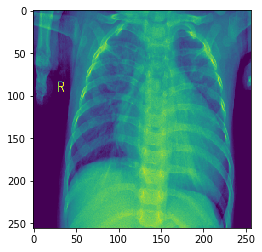

In [4]:


plt.figure()
plt.imshow(np.array(pneumoniadf.iloc[1,np.arange(0,pneumoniadf.iloc[1,:].shape[0])]).reshape(256,256))
plt.grid(False)
plt.show()

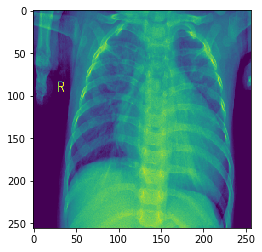

In [5]:

plt.figure()
plt.imshow(np.array(pneumoniadf.iloc[1,np.arange(0,pneumoniadf.iloc[2,:].shape[0])]).reshape(256,256))
plt.grid(False)
plt.show()

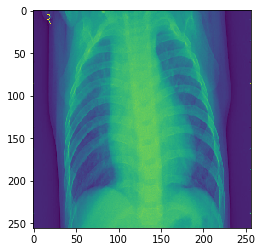

In [6]:

plt.figure()
plt.imshow(np.array(pneumoniadf.iloc[20,np.arange(0,pneumoniadf.iloc[2,:].shape[0])]).reshape(256,256))
plt.grid(False)
plt.show()

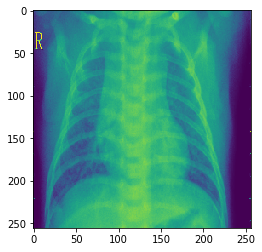

In [7]:

plt.figure()
plt.imshow(np.array(pneumoniadf.iloc[1000,np.arange(0,pneumoniadf.iloc[2,:].shape[0])]).reshape(256,256))
plt.grid(False)
plt.show()

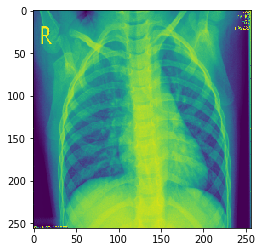

In [8]:
plt.figure()
plt.imshow(np.array(pneumoniadf.iloc[2000,np.arange(0,pneumoniadf.iloc[2,:].shape[0])]).reshape(256,256))
plt.grid(False)
plt.show()

#### Normal Images from Train set

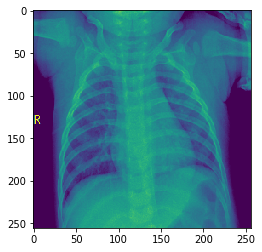

In [6]:

plt.figure()
plt.imshow(np.array(normaldf.iloc[1,np.arange(0,normaldf.iloc[1,:].shape[0])]).reshape(256,256))
plt.grid(False)
plt.show()

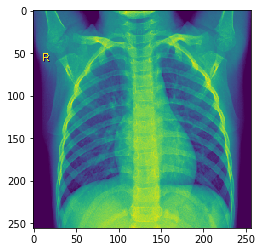

In [7]:

plt.figure()
plt.imshow(np.array(normaldf.iloc[100,np.arange(0,normaldf.iloc[1,:].shape[0])]).reshape(256,256))
plt.grid(False)
plt.show()

In [8]:
normaldf.shape

(1341, 65536)

In [9]:
pneumoniadf.shape

(3875, 65536)